# The sample guessing game
In this game, we analyze 6 files, `sample[0-6].root` that are each a small 500k event sample of a CMS NanoAOD dataset.  All generator-level branches have been removed.  Your task is to figure out which file came from which dataset.  To make it a bit easier, here are the 6 possible datasets:

   * `DY2JetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8`, producing $Z(\to \ell\ell)+2j$ events via QCD processes;
   * `ST_t-channel_4f_leptonDecays_TuneCP5_PSweights_13TeV-amcatnlo-pythia8`, producing single-top events through W boson exchange between a light and $b$ quark, where the $W$ boson from the top decay itself decays leptonically;
   * `GluGluHToWWTo2L2Nu_M125_13TeV_powheg2_JHUGenV714_pythia8`, producing Higgs boson events through gluon fusion, where the Higgs boson decays via $H\to WW^{*}\to 2\ell2\nu$;
   * `GluGluHToZZTo2L2Q_M125_13TeV_powheg2_JHUGenV7011_pythia8`, producing Higgs boson events through gluon fusion, where the Higgs boson decays via $H\to ZZ^{*}\to 2\ell2q$;
   * `TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8`, producing di-top events, where both $W$ bosons from the top quark decays must decay leptonically; and
   * `WWTo2L2Nu_NNPDF31_TuneCP5_13TeV-powheg-pythia8`, producing WW diboson events, where both W bosons decay leptonically $W\to \ell\nu$.
   
In all cases, the lepton can be any flavor, $\ell\in\{e,\mu,\tau\}$.  All 6 datasets were produced with the `RunIIAutumn18NanoAODv7-Nano02Apr2020_102X_upgrade2018_realistic_v21` conditions tag.

In [99]:
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

import hist
from coffea.nanoevents import NanoEventsFactory

In [100]:
prefix = 'root://xcache//store/user/ncsmith/samplegame/'
samples = [
    NanoEventsFactory.from_root(prefix + "sample%d.root" % i).events()
    for i in range(6)
]

In [108]:
samples[0].FatJet.fields

['area',
 'btagCMVA',
 'btagCSVV2',
 'btagDDBvL',
 'btagDDBvL_noMD',
 'btagDDCvB',
 'btagDDCvB_noMD',
 'btagDDCvL',
 'btagDDCvL_noMD',
 'btagDeepB',
 'btagHbb',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'mass',
 'msoftdrop',
 'n2b1',
 'n3b1',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'subJetIdx1',
 'subJetIdx2',
 'electronIdx3SJ',
 'muonIdx3SJ',
 'hadronFlavour',
 'nBHadrons',
 'nCHadrons',
 'subJetIdx1G',
 'subJetIdx2G',
 'subJetIdxG']

Here's an example of plotting all 6 samples together for one variable (here `Jet.pt`)
Let your physics intuition guide you, and good luck!

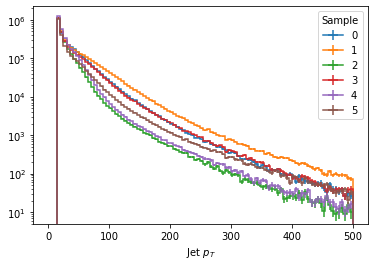

In [101]:
h = (
    hist.Hist.new
    .IntCat(range(6), label="Sample")
    .Reg(100, 0, 500, label="Jet $p_T$")
    .Double()
)
for i, sample in enumerate(samples):
    h.fill(i, ak.flatten(sample.Jet.pt))
#     h.fill(i, (ak.num(sample.Jet)))

fig, ax = plt.subplots()
h.plot1d(ax=ax)
ax.set_yscale("log")
ax.legend(title="Sample")

In [131]:
ak.fill_none(ak.firsts(sample.FatJet).msoftdrop, 0)

<Array [0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0.125] type='500000 * float64'>

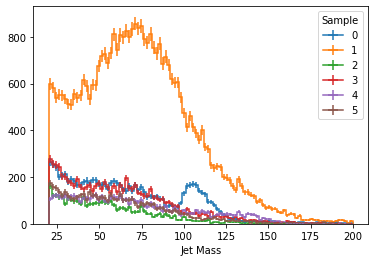

In [134]:
h = (
    hist.Hist.new
    .IntCat(range(6), label="Sample")
    .Reg(100, 20, 200, label="Jet Mass")
    .Double()
)
for i, sample in enumerate(samples):
    h.fill(i, ak.fill_none(ak.firsts(sample.FatJet).msoftdrop, 0))
#     h.fill(i, (ak.num(sample.Jet)))

fig, ax = plt.subplots()
h.plot1d(ax=ax)
# ax.set_yscale("log")
ax.legend(title="Sample")

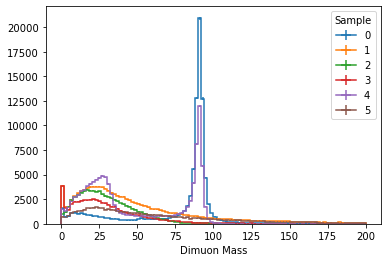

In [147]:
h = (
    hist.Hist.new
    .IntCat(range(6), label="Sample")
    .Reg(100, 0, 200, label="Dimuon Mass")
    .Double()
)
for i, sample in enumerate(samples):
    dimuons = ak.num(sample.Muon) == 2
    h.fill(i, (sample[dimuons].Muon[:, 0] + sample[dimuons].Muon[:, 1]).mass)
#     h.fill(i, (ak.num(sample.Jet)))

fig, ax = plt.subplots()
h.plot1d(ax=ax)
# ax.set_yscale("log")
ax.legend(title="Sample")

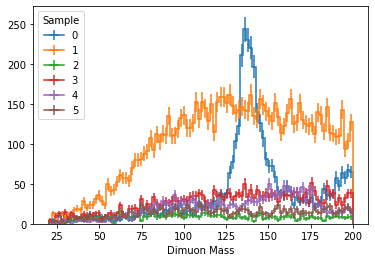

In [146]:
h = (
    hist.Hist.new
    .IntCat(range(6), label="Sample")
    .Reg(100, 20, 200, label="Dimuon Mass")
    .Double()
)
for i, sample in enumerate(samples):
    dimuons = ak.num(sample.Muon) == 2
    fatjets = ak.num(sample.FatJet) >= 1
    both = dimuons * fatjets
    tot_vec = sample[both].Muon[:, 0] + sample[both].Muon[:, 1] + sample[both].FatJet[:, 0]
    h.fill(i, tot_vec.mass)
#     h.fill(i, (ak.num(sample.Jet)))

fig, ax = plt.subplots()
h.plot1d(ax=ax)
# ax.set_yscale("log")
ax.legend(title="Sample")

In [145]:
dimuons = ak.num(sample.Muon) == 2
fatjets = ak.num(sample.FatJet) >= 1
both = dimuons * fatjets
sample[both].Muon[:, 0] + sample[both].Muon[:, 1] + sample[both].FatJet[:, 0]

<LorentzVectorArray [{x: 199, y: -160, ... t: 209}] type='4775 * LorentzVector["...'>

In [140]:
(sample[dimuons].Muon[:, 0] + sample[dimuons].Muon[:, 1]).mass

<Array [35.6, 87, 90.2, ... 93, 94.3, 90.4] type='96866 * float32'>

In [138]:
ak.num(sample.Muon) == 2

<Array [False, False, False, ... True, False] type='500000 * bool'>

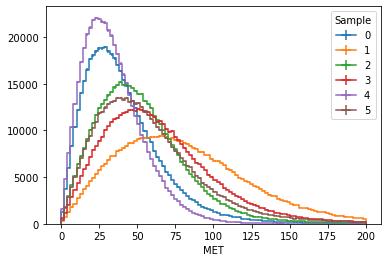

In [118]:
h = (
    hist.Hist.new
    .IntCat(range(6), label="Sample")
    .Reg(100, 0, 200, label="MET")
    .Double()
)
for i, sample in enumerate(samples):
    h.fill(i, sample.MET.pt)
#     h.fill(i, (ak.num(sample.Jet)))

fig, ax = plt.subplots()
h.plot1d(ax=ax)
# ax.set_yscale("log")
ax.legend(title="Sample")

In [121]:
sample.fields

['Muon',
 'IsoTrack',
 'FsrPhoton',
 'fixedGridRhoFastjetCentralCalo',
 'Pileup',
 'fixedGridRhoFastjetCentral',
 'TkMET',
 'SV',
 'run',
 'RawMET',
 'SoftActivityJetHT',
 'luminosityBlock',
 'TrigObj',
 'PuppiMET',
 'OtherPV',
 'SoftActivityJetNjets10',
 'Electron',
 'SoftActivityJetHT2',
 'SoftActivityJetHT10',
 'Jet',
 'btagWeight',
 'CaloMET',
 'RawPuppiMET',
 'genWeight',
 'CorrT1METJet',
 'SoftActivityJetNjets5',
 'SoftActivityJetNjets2',
 'MET',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'SoftActivityJetHT5',
 'ChsMET',
 'SoftActivityJet',
 'FatJet',
 'PV',
 'event',
 'Tau',
 'SubJet',
 'Photon',
 'fixedGridRhoFastjetAll',
 'HTXS',
 'fixedGridRhoFastjetCentralNeutral']

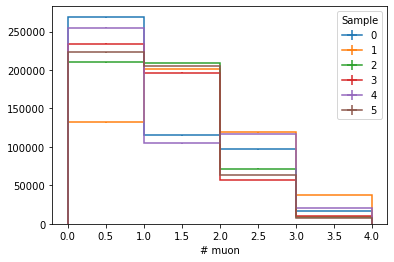

In [122]:
h = (
    hist.Hist.new
    .IntCat(range(6), label="Sample")
    .Reg(4, 0, 4, label="# muon")
    .Double()
)
for i, sample in enumerate(samples):
    h.fill(i, ak.num(sample.Muon))
#     h.fill(i, (ak.num(sample.Jet)))

fig, ax = plt.subplots()
h.plot1d(ax=ax)
# ax.set_yscale("log")
ax.legend(title="Sample")

In [85]:
# using ak to count stuff
ak.num(sample.Electron)

<Array [0, 1, 0, 1, 1, 2, ... 1, 0, 1, 0, 0, 1] type='500000 * int64'>

In [92]:
sample.Jet.btagDeepB

<Array [[], [-2, -2], ... -2, -2, -2, 0.304]] type='500000 * var * float32[param...'>

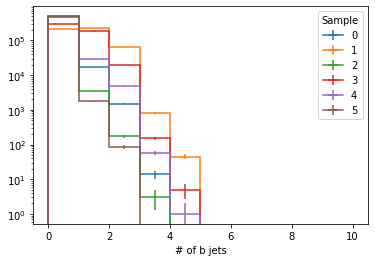

In [98]:
h = (
    hist.Hist.new
    .IntCat(range(6), label="Sample")
    .Reg(10, 0, 10, label="# of b jets")
    .Double()
)
for i, sample in enumerate(samples):
#     h.fill(i, ak.flatten(sample.Jet.pt))
    h.fill(i, (ak.num(sample.Jet[sample.Jet.btagDeepB>0.9])))

fig, ax = plt.subplots()
h.plot1d(ax=ax)
ax.set_yscale("log")
ax.legend(title="Sample")